In [1]:
import pandas as pd
from __future__ import division
import math
import datetime
import numpy as np
import scipy as sc
import pylab as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import xlrd
import xlsxwriter

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import scipy.stats
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
mpl.pyplot.style.use('ggplot')
mpl.rcParams['font.family'] = ['Bitstream Vera Sans']

In [130]:
# not finished yet
#
#
#


bashCommand = "ls -1 > filenames.txt"
import subprocess
process = subprocess.Popen(bashCommand.split(),cwd='/home/albert/Doctoral_project/StroopExperiment/fMRI_Stroop_fourcolours/', stdout=subprocess.PIPE)
output, error = process.communicate()

In [3]:
StudyName = 'SMRI'
output
error

NameError: name 'output' is not defined

In [4]:
# in order to load all the filenames in a list: "ls -1 > filenames.txt" in ubuntu bash
# use this in cleand_data!

# load in all the files
folder = '/home/albert/Doctoral_project/StroopExperiment/fMRI_Stroop_fourcolours/' 
filenames = pd.read_csv(folder + 'filenames.txt', sep=" ", header = None)
filenames.columns=['FileNames']
filenames.head()
#filenames.select_dtypes(include=['object']).apply(str())
filenames.head()
filenames.astype('S32')
FileNameList = []
for i in range (0,len(filenames)): 
  if 'csv' in filenames.FileNames[i]:
    FileNameList.append(filenames.FileNames[i])


In [5]:
chunks = []

# Essentially every single df which is read from the csv files is being appended
#to the chunks list which in the next cell is being put into one big dataframe

for i in range(0,len(FileNameList)):
  if StudyName in FileNameList[i]:
      df = pd.read_csv(folder+FileNameList[i] 
               
                 ,parse_dates={'datetime':[1,2]}, error_bad_lines=False)
      df.columns = ['linecolor','TrialType','Colour','corrAns','Word','NofPractice','delete','NofPractice2','delete2',
              'delete3','delete4','delete5','delete6','delete7','NofTrial2','NofTrial','ISI','Response','RT'
                    ,'date','Framerate','Experiment','session','participant','session']
      df = df.iloc[:, [0,1,3,15,16,17,18,19,20,21,22,23]]


      #a = [x*2 for x in range(0,int(FirstFix/2))]
      #b = [x for x in range(FirstFix,int(FirstFix+307))]
      #c= a+b # cut out the unnecessary rows but include the training data
      #c = b # cut out everything but the 306 trials of main experiment    
      #df = df.iloc[c,:]
      chunks.append(df)





# DataFrame now holds all data 
DataFrameComplete  = pd.concat(chunks, ignore_index=True)
DataFrameComplete =  DataFrameComplete.loc[DataFrameComplete.NofTrial.isnull() != True]

print(DataFrameComplete.tail())
DataFrameComplete.head()

      linecolor  TrialType  corrAns  NofTrial      ISI Response        RT  \
11679    6 BLAU  congruent      3.0     595.0  0.35795        3  0.476338   
11680     0 ROT  congruent      2.0     596.0  0.47163        2  0.428501   
11681    6 BLAU  congruent      3.0     597.0  0.40637        3  0.549984   
11682    3 GRÜN  congruent      2.0     598.0  0.31533        2  0.529092   
11683     0 ROT  congruent      2.0     599.0  0.37320        2  0.527237   

                   date  Framerate Experiment session participant  
11679  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8  
11680  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8  
11681  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8  
11682  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8  
11683  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8  


linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106    3 GRÜN    congruent      2.0       0.0  10.00000        2  0.834837   
107    3 GRÜN    congruent      2.0       1.0   0.60295        2  0.590948   
108     1 ROT  incongruent      3.0       2.0   0.65782        3  0.842361   
109    9 GELB    congruent      3.0       3.0   0.37575        3  0.691485   
110    4 GRÜN  incongruent      3.0       4.0   0.59359        3  0.823725   

                 date  Framerate Experiment session participant  
106  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
107  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
108  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
109  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
110  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1

In [8]:
# drop out all RT  values higher than 1.0s
print(len(DataFrameComplete.loc[DataFrameComplete.RT <= 1]))
len(DataFrameComplete.loc[DataFrameComplete.RT <= 1.5])


8956


9506

In [9]:
DataFrameComplete = DataFrameComplete.dropna( axis=0, how='any', thresh=None)
print(DataFrameComplete.dtypes)
DataFrameComplete.columns
DataFrameComplete


linecolor       object
TrialType       object
corrAns        float64
NofTrial       float64
ISI            float64
Response        object
RT             float64
date            object
Framerate      float64
Experiment      object
session         object
participant     object
dtype: object


linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106      3 GRÜN    congruent      2.0       0.0  10.00000        2  0.834837   
107      3 GRÜN    congruent      2.0       1.0   0.60295        2  0.590948   
108       1 ROT  incongruent      3.0       2.0   0.65782        3  0.842361   
109      9 GELB    congruent      3.0       3.0   0.37575        3  0.691485   
110      4 GRÜN  incongruent      3.0       4.0   0.59359        3  0.823725   
111     11 GELB  incongruent      2.0       5.0   0.69992        2  0.714757   
112       1 ROT  incongruent      3.0       6.0   0.64979        3  0.710633   
113     11 GELB  incongruent      2.0       7.0   0.39149        2  0.775869   
114     11 GELB  incongruent      2.0       8.0   0.30145        2  0.676785   
115     10 GELB  incongruent      2.0       9.0   0.31533        2  0.835561   
116      6 BLAU    congruent      3.0      10.0   0.41019        3  0.630994   
117      5 GRÜN  incongruent      3.0      11.0   0.38112        3  0.554523   
118      8 BLAU  incongruent      2.0      12.0   0.58408        2  0.901276   
119      4 GRÜN  incongruent      3.0      13.0   0.39149        3  0.591791   
120       1 ROT  incongruent      3.0      14.0   0.31100        3  0.686470   
121       2 ROT  incongruent      3.0      15.0   0.55602        3  0.552079   
122      7 BLAU  incongruent      2.0      16.0   0.41606        2  1.083363   
123      9 GELB    congruent      3.0      17.0   0.39149        3  0.821117   
124       0 ROT    congruent      2.0      18.0   0.45577        2  0.672648   
125      9 GELB    congruent      3.0      19.0   0.31482        3  0.541137   
126      8 BLAU  incongruent      2.0      20.0   0.31533        2  1.147031   
127     11 GELB  incongruent      2.0      21.0   0.30145        2  0.605186   
128      3 GRÜN    congruent      2.0      22.0   0.55167        2  0.495385   
129       0 ROT    congruent      2.0      23.0   0.67007        2  0.673828   
130     11 GELB  incongruent      2.0      24.0   0.37249        2  0.543388   
131       1 ROT  incongruent      3.0      25.0   0.34332        3  0.661612   
132      4 GRÜN  incongruent      3.0      26.0   0.31482        3  0.555577   
133      9 GELB    congruent      3.0      27.0   0.60055        3  0.481238   
134     10 GELB  incongruent      2.0      28.0   0.55602        2  0.653388   
135      9 GELB    congruent      3.0      29.0   0.43134        3  0.787475   
...         ...          ...      ...       ...       ...      ...       ...   
11654     1 ROT  incongruent      3.0     570.0   0.37497        3  0.479254   
11655    6 BLAU    congruent      3.0     571.0   0.59359        3  0.441435   
11656    6 BLAU    congruent      3.0     572.0   0.38368        3  0.524763   
11657     0 ROT    congruent      2.0     573.0   0.59133        2  0.757693   
11658    9 GELB    congruent      3.0     574.0   0.42924        3  0.513594   
11659    9 GELB    congruent      3.0     575.0   0.64979        3  0.369187   
11660   11 GELB  incongruent      2.0     576.0   0.48307        2  0.489167   
11661    6 BLAU    congruent      3.0     577.0   0.46005        3  0.524773   
11662   11 GELB  incongruent      2.0     578.0   0.52129        2  0.490436   
11663     1 ROT  incongruent      3.0     579.0   0.31482        3  0.430383   
11664   10 GELB  incongruent      2.0     580.0   0.51807        2  0.490844   
11665    5 GRÜN  incongruent      3.0     581.0   0.58569        3  0.564845   
11666    5 GRÜN  incongruent      3.0     582.0   0.31613        3  0.479518   
11667    6 BLAU    congruent      3.0     583.0   0.43171        3  0.657828   
11668    7 BLAU  incongruent      2.0     584.0   0.58187        2  0.415039   
11669    9 GELB    congruent      3.0     585.0   0.40637        3  0.466570   
11670    6 BLAU    congruent      3.0     586.0   0.36382        3  0.464854   
11671     0 ROT    congruent      2.0     587.0   0.31100        2  0.382242   
11672 

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn.apionly as sns
% matplotlib inline
import importlib
import seaborn
importlib.reload(seaborn);
DataFrameComplete.head()

linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106    3 GRÜN    congruent      2.0       0.0  10.00000        2  0.834837   
107    3 GRÜN    congruent      2.0       1.0   0.60295        2  0.590948   
108     1 ROT  incongruent      3.0       2.0   0.65782        3  0.842361   
109    9 GELB    congruent      3.0       3.0   0.37575        3  0.691485   
110    4 GRÜN  incongruent      3.0       4.0   0.59359        3  0.823725   

                 date  Framerate Experiment session participant  
106  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
107  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
108  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
109  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1  
110  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1

In [11]:
# order the trials into high-conflict, low-conflict trials
DataFrameComplete = DataFrameComplete.assign(ConflictLevel = 'undefined')

#Sorting into High-High-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) == 'incongruent')  &
                      (DataFrameComplete.TrialType.shift(0) == 'incongruent'), 'ConflictLevel'] = 'HH'

#Sorting into High-Low-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) == 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) != 'incongruent'), 'ConflictLevel'] = 'HL'

#Sorting into Low-High-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) != 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) == 'incongruent'), 'ConflictLevel'] = 'LH'

#Sorting into Low-Low-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) != 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) != 'incongruent'), 'ConflictLevel'] = 'LL'

# First trial



#DataFrameComplete.loc[DataFrameComplete.TrialType.shift(1) != 'incongruent', 'ConflictLevel'] = 'jetztmalwasanderes'


DataFrameComplete.iloc[0:700,:]
DataFrameComplete.tail()

linecolor  TrialType  corrAns  NofTrial      ISI Response        RT  \
11679    6 BLAU  congruent      3.0     595.0  0.35795        3  0.476338   
11680     0 ROT  congruent      2.0     596.0  0.47163        2  0.428501   
11681    6 BLAU  congruent      3.0     597.0  0.40637        3  0.549984   
11682    3 GRÜN  congruent      2.0     598.0  0.31533        2  0.529092   
11683     0 ROT  congruent      2.0     599.0  0.37320        2  0.527237   

                   date  Framerate Experiment session participant  \
11679  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8   
11680  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8   
11681  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8   
11682  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8   
11683  2017_Nov_15_1105  98.677743     Stroop      B2       SMRI8   

      ConflictLevel  
11679            HL  
11680            LL  
11681            LL  
11682            LL  
11683            LL

In [12]:
# deletes all trials in which no RT was recorded aka as no answer was given

DataFrameComplete = DataFrameComplete[np.isfinite(DataFrameComplete['RT'])]

# this table should be empty as all NaN trials are eliminated
DataFrameComplete[np.isnan(DataFrameComplete["RT"])]


Empty DataFrame
Columns: [linecolor, TrialType, corrAns, NofTrial, ISI, Response, RT, date, Framerate, Experiment, session, participant, ConflictLevel]
Index: []

In [13]:
DataFrameComplete.loc[(DataFrameComplete.linecolor == '0 ROT') | (DataFrameComplete.linecolor == '10 GELB') | (DataFrameComplete.linecolor == '7 BLAU') , 'linecolor'] = 'ROT'
DataFrameComplete.loc[(DataFrameComplete.linecolor == '3 GRÜN') | (DataFrameComplete.linecolor == '11 GELB') | (DataFrameComplete.linecolor == '8 BLAU') , 'linecolor'] = 'GRÜN'
DataFrameComplete.loc[(DataFrameComplete.linecolor == '6 BLAU') | (DataFrameComplete.linecolor == '1 ROT') | (DataFrameComplete.linecolor == '4 GRÜN') , 'linecolor'] = 'BLAU'
DataFrameComplete.loc[(DataFrameComplete.linecolor == '9 GELB') | (DataFrameComplete.linecolor == '2 ROT') | (DataFrameComplete.linecolor == '5 GRÜN') , 'linecolor'] = 'GELB'
DataFrameComplete.loc[(DataFrameComplete.linecolor == 'ROT'), 'linecolor'] = 'RED'
DataFrameComplete.loc[(DataFrameComplete.linecolor == 'GRÜN'), 'linecolor'] = 'GREEN'
DataFrameComplete.loc[(DataFrameComplete.linecolor == 'BLAU'), 'linecolor'] = 'BLUE'
DataFrameComplete.loc[(DataFrameComplete.linecolor == 'GELB'), 'linecolor'] = 'YELLOW'

DataFrameComplete

linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106       GREEN    congruent      2.0       0.0  10.00000        2  0.834837   
107       GREEN    congruent      2.0       1.0   0.60295        2  0.590948   
108        BLUE  incongruent      3.0       2.0   0.65782        3  0.842361   
109      YELLOW    congruent      3.0       3.0   0.37575        3  0.691485   
110        BLUE  incongruent      3.0       4.0   0.59359        3  0.823725   
111       GREEN  incongruent      2.0       5.0   0.69992        2  0.714757   
112        BLUE  incongruent      3.0       6.0   0.64979        3  0.710633   
113       GREEN  incongruent      2.0       7.0   0.39149        2  0.775869   
114       GREEN  incongruent      2.0       8.0   0.30145        2  0.676785   
115         RED  incongruent      2.0       9.0   0.31533        2  0.835561   
116        BLUE    congruent      3.0      10.0   0.41019        3  0.630994   
117      YELLOW  incongruent      3.0      11.0   0.38112        3  0.554523   
118       GREEN  incongruent      2.0      12.0   0.58408        2  0.901276   
119        BLUE  incongruent      3.0      13.0   0.39149        3  0.591791   
120        BLUE  incongruent      3.0      14.0   0.31100        3  0.686470   
121      YELLOW  incongruent      3.0      15.0   0.55602        3  0.552079   
122         RED  incongruent      2.0      16.0   0.41606        2  1.083363   
123      YELLOW    congruent      3.0      17.0   0.39149        3  0.821117   
124         RED    congruent      2.0      18.0   0.45577        2  0.672648   
125      YELLOW    congruent      3.0      19.0   0.31482        3  0.541137   
126       GREEN  incongruent      2.0      20.0   0.31533        2  1.147031   
127       GREEN  incongruent      2.0      21.0   0.30145        2  0.605186   
128       GREEN    congruent      2.0      22.0   0.55167        2  0.495385   
129         RED    congruent      2.0      23.0   0.67007        2  0.673828   
130       GREEN  incongruent      2.0      24.0   0.37249        2  0.543388   
131        BLUE  incongruent      3.0      25.0   0.34332        3  0.661612   
132        BLUE  incongruent      3.0      26.0   0.31482        3  0.555577   
133      YELLOW    congruent      3.0      27.0   0.60055        3  0.481238   
134         RED  incongruent      2.0      28.0   0.55602        2  0.653388   
135      YELLOW    congruent      3.0      29.0   0.43134        3  0.787475   
...         ...          ...      ...       ...       ...      ...       ...   
11654      BLUE  incongruent      3.0     570.0   0.37497        3  0.479254   
11655      BLUE    congruent      3.0     571.0   0.59359        3  0.441435   
11656      BLUE    congruent      3.0     572.0   0.38368        3  0.524763   
11657       RED    congruent      2.0     573.0   0.59133        2  0.757693   
11658    YELLOW    congruent      3.0     574.0   0.42924        3  0.513594   
11659    YELLOW    congruent      3.0     575.0   0.64979        3  0.369187   
11660     GREEN  incongruent      2.0     576.0   0.48307        2  0.489167   
11661      BLUE    congruent      3.0     577.0   0.46005        3  0.524773   
11662     GREEN  incongruent      2.0     578.0   0.52129        2  0.490436   
11663      BLUE  incongruent      3.0     579.0   0.31482        3  0.430383   
11664       RED  incongruent      2.0     580.0   0.51807        2  0.490844   
11665    YELLOW  incongruent      3.0     581.0   0.58569        3  0.564845   
11666    YELLOW  incongruent      3.0     582.0   0.31613        3  0.479518   
11667      BLUE    congruent      3.0     583.0   0.43171        3  0.657828   
11668       RED  incongruent      2.0     584.0   0.58187        2  0.415039   
11669    YELLOW    congruent      3.0     585.0   0.40637        3  0.466570   
11670      BLUE    congruent      3.0     586.0   0.36382        3  0.464854   
11671       RED    congruent      2.0     587.0   0.31100        2  0.382242   
11672 

In [14]:
DataFrameComplete.Response.dtype

is_string_dtype(DataFrameComplete['Response'])
is_numeric_dtype(DataFrameComplete['Response'])

DataFrameComplete.loc[((DataFrameComplete.Response == '3') & (DataFrameComplete.corrAns == 3.0)) | ((DataFrameComplete.Response == '2') & (DataFrameComplete.corrAns == 2.0)) , 'Response'] = 1
DataFrameComplete.loc[((DataFrameComplete.Response == '3') & (DataFrameComplete.corrAns == 2.0)) | ((DataFrameComplete.Response == '2') & (DataFrameComplete.corrAns == 3.0)) , 'Response'] = 0

# sometimes Response comes as float (not string)
DataFrameComplete.loc[((DataFrameComplete.Response == 3.0) & (DataFrameComplete.corrAns == 3.0)) | ((DataFrameComplete.Response == 2.0) & (DataFrameComplete.corrAns == 2.0)) , 'Response'] = 1
DataFrameComplete.loc[((DataFrameComplete.Response == 3.0) & (DataFrameComplete.corrAns == 2.0)) | ((DataFrameComplete.Response == 2.0) & (DataFrameComplete.corrAns == 3.0)) , 'Response'] = 0


a =DataFrameComplete.Response.loc[DataFrameComplete.participant == 'SMRI8']
type(a.iloc[2])



int

In [15]:
# DO NOT
# change the date
DataFrameComplete2 = DataFrameComplete
DataFrameComplete = DataFrameComplete.assign(Datum = 'undefined')
DateDict = {'Jan': '01','Feb':'02','Mar':'03','Apr':'04','Mai': '05', 'Jun': '06', 'Jul': '07', 'Aug':'08', 'Sep': '09',
           'Okt': '10', 'Nov': '11', 'Dez': '12'}

for index, row in DataFrameComplete.iterrows(): 
    
  Date = DataFrameComplete.date.iloc[i]
  year = Date[0:4] 
  month = Date[5:8]
  day = Date[9:11]




  Datum = int(year + DateDict[month] + day )
  DataFrameComplete.at[i,'Datum'] = Datum
    
DataFrameComplete

linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106       GREEN    congruent      2.0       0.0  10.00000        1  0.834837   
107       GREEN    congruent      2.0       1.0   0.60295        1  0.590948   
108        BLUE  incongruent      3.0       2.0   0.65782        1  0.842361   
109      YELLOW    congruent      3.0       3.0   0.37575        1  0.691485   
110        BLUE  incongruent      3.0       4.0   0.59359        1  0.823725   
111       GREEN  incongruent      2.0       5.0   0.69992        1  0.714757   
112        BLUE  incongruent      3.0       6.0   0.64979        1  0.710633   
113       GREEN  incongruent      2.0       7.0   0.39149        1  0.775869   
114       GREEN  incongruent      2.0       8.0   0.30145        1  0.676785   
115         RED  incongruent      2.0       9.0   0.31533        1  0.835561   
116        BLUE    congruent      3.0      10.0   0.41019        1  0.630994   
117      YELLOW  incongruent      3.0      11.0   0.38112        1  0.554523   
118       GREEN  incongruent      2.0      12.0   0.58408        1  0.901276   
119        BLUE  incongruent      3.0      13.0   0.39149        1  0.591791   
120        BLUE  incongruent      3.0      14.0   0.31100        1  0.686470   
121      YELLOW  incongruent      3.0      15.0   0.55602        1  0.552079   
122         RED  incongruent      2.0      16.0   0.41606        1  1.083363   
123      YELLOW    congruent      3.0      17.0   0.39149        1  0.821117   
124         RED    congruent      2.0      18.0   0.45577        1  0.672648   
125      YELLOW    congruent      3.0      19.0   0.31482        1  0.541137   
126       GREEN  incongruent      2.0      20.0   0.31533        1  1.147031   
127       GREEN  incongruent      2.0      21.0   0.30145        1  0.605186   
128       GREEN    congruent      2.0      22.0   0.55167        1  0.495385   
129         RED    congruent      2.0      23.0   0.67007        1  0.673828   
130       GREEN  incongruent      2.0      24.0   0.37249        1  0.543388   
131        BLUE  incongruent      3.0      25.0   0.34332        1  0.661612   
132        BLUE  incongruent      3.0      26.0   0.31482        1  0.555577   
133      YELLOW    congruent      3.0      27.0   0.60055        1  0.481238   
134         RED  incongruent      2.0      28.0   0.55602        1  0.653388   
135      YELLOW    congruent      3.0      29.0   0.43134        1  0.787475   
...         ...          ...      ...       ...       ...      ...       ...   
11655      BLUE    congruent      3.0     571.0   0.59359        1  0.441435   
11656      BLUE    congruent      3.0     572.0   0.38368        1  0.524763   
11657       RED    congruent      2.0     573.0   0.59133        1  0.757693   
11658    YELLOW    congruent      3.0     574.0   0.42924        1  0.513594   
11659    YELLOW    congruent      3.0     575.0   0.64979        1  0.369187   
11660     GREEN  incongruent      2.0     576.0   0.48307        1  0.489167   
11661      BLUE    congruent      3.0     577.0   0.46005        1  0.524773   
11662     GREEN  incongruent      2.0     578.0   0.52129        1  0.490436   
11663      BLUE  incongruent      3.0     579.0   0.31482        1  0.430383   
11664       RED  incongruent      2.0     580.0   0.51807        1  0.490844   
11665    YELLOW  incongruent      3.0     581.0   0.58569        1  0.564845   
11666    YELLOW  incongruent      3.0     582.0   0.31613        1  0.479518   
11667      BLUE    congruent      3.0     583.0   0.43171        1  0.657828   
11668       RED  incongruent      2.0     584.0   0.58187        1  0.415039   
11669    YELLOW    congruent      3.0     585.0   0.40637        1  0.466570   
11670      BLUE    congruent      3.0     586.0   0.36382        1  0.464854   
11671       RED    congruent      2.0     587.0   0.31100        1  0.382242   
11672     GREEN  incongruent      2.0     588.0   0.50404        1  0.670620   
11673 

0.9699608184588594 0.9635627530364372 0.9597345132743362 0.9655330882352942


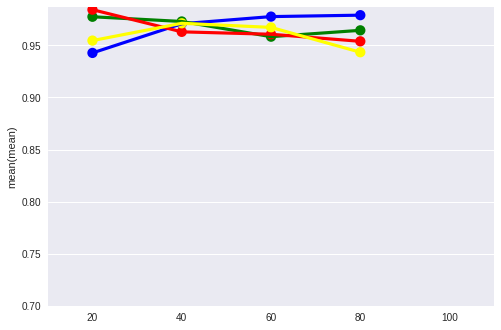

In [15]:
# Conditional Accuracy 
def CAFsingle (DataFrame,lowerboundary,upperboundary,participant,condition,congruency):
   
  correcttrials =  len(DataFrame.loc[(DataFrame['session'].str.contains(condition)) &(DataFrame.TrialType == congruency) &(DataFrame.participant == participant) & (DataFrame.Response == 1)  & (DataFrame.RT >= lowerboundary) & (DataFrame.RT < upperboundary)])
  trials = len(DataFrame.loc[(DataFrame['session'].str.contains(condition)) &(DataFrame.TrialType == congruency) & (DataFrame.participant == participant) & (DataFrame.RT >= lowerboundary)& (DataFrame.RT < upperboundary)])
  try: 
    value = correcttrials / trials
  except: 
    value = float('NaN') #aren't we already removing the  NaNs ?
   
  if trials < 3:
    value = float('NaN')    
  return value

def CAF (DataFrame,participant,condition,congruency): 
  list = []
#  for i in [0.2+0.1*g for g in range(0,13)]:
  for i in [0.2+0.2*g for g in range(0,5)]:
#    value = CAFsingle(DataFrame,i,i+0.1,participant,condition,congruency)
    value = CAFsingle(DataFrame,i,i+0.2,participant,condition,congruency)
    
    list.append(value)
  #accurcacy = len(DataFrame.loc[(DataFrame['session'].str.contains(condition)) &(DataFrame.participant == participant) & (DataFrame.Response == 1)]) / len(DataFrame.loc[(DataFrame['session'].str.contains(condition)) &(DataFrame.participant == participant)])
  return list #, accurcacy

#Times = [0.25+i*0.1 for i in range(0,13)]
Times = [20 + i*20 for i in range(0,5)] #why?

def OverallCAF (DataFrame,condition,congruency):
  participantlist = DataFrame.participant.unique()

#  series = {participantlist[0] : pd.Series(CAF(DataFrame,participantlist[0],condition,congruency), index=['0.25','0.35', '0.45', '0.55','0.65', '0.75', '0.85','0.95', '1.05', '1.15','1.25', '1.35', '1.45'])}  
  series = {participantlist[0] : pd.Series(CAF(DataFrame,participantlist[0],condition,congruency), index=['20','40','60','80','100'])}  
  DF = pd.DataFrame(series)
  for y in participantlist[1:]:        
    series = {y : pd.Series(CAF(DataFrame,y,condition,congruency), index=['20','40','60','80','100'])}  
    series = pd.DataFrame(series)
    DF = pd.concat([DF,series], axis =1)
  DF['mean'] = DF.mean(axis=1, skipna = True)
   
  return DF

def getAccuracies(DataFrame,condition, congruency):
  trials=  len(DataFrame.loc[(DataFrame['session'].str.contains(condition))  &(DataFrame.TrialType == congruency) ])          
  correcttrials = len(DataFrame.loc[(DataFrame['session'].str.contains(condition)) &(DataFrame.TrialType == congruency) & (DataFrame.Response == 1)]) 
  return correcttrials / trials




df_A_con   = OverallCAF(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'A','congruent')
df_A_incon = OverallCAF(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'A','incongruent')
df_B_con   = OverallCAF(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'B','congruent')
df_B_incon = OverallCAF(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'B','incongruent')

AccuracyAcon = getAccuracies(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'A','congruent')
AccuracyAincon = getAccuracies(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'A','incongruent')

AccuracyBcon = getAccuracies(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'B','congruent')
AccuracyBincon = getAccuracies(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'B','incongruent')


sns.pointplot(Times,df_A_con['mean'], color = 'blue')
sns.pointplot(Times,df_A_incon['mean'],color = 'green')
sns.pointplot(Times,df_B_con['mean'],color = 'red')
lm = sns.pointplot(Times,df_B_incon['mean'],color = 'yellow')
axes = lm.axes
axes.set_ylim(0.7,)

print(AccuracyAcon,AccuracyAincon, AccuracyBcon, AccuracyBincon)

0.9699608184588594 0.9635627530364372 0.9597345132743362 0.9655330882352942


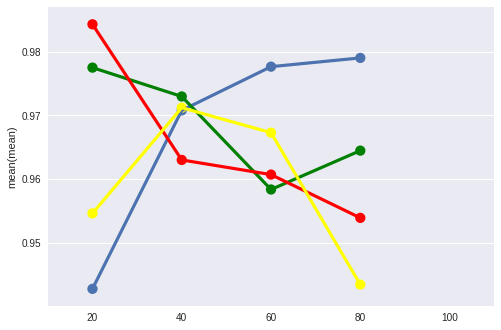

In [19]:
sns.pointplot(Times,df_A_con['mean'])
sns.pointplot(Times,df_A_incon['mean'],color = 'green')
sns.pointplot(Times,df_B_con['mean'],color = 'red')
sns.pointplot(Times,df_B_incon['mean'],color = 'yellow')



print(AccuracyAcon,AccuracyAincon, AccuracyBcon, AccuracyBincon)

In [20]:
def distributions(DataFrame, Proband, condition):
  allcongruent_correct = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']
  allincongruent_correct = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']
  return  allcongruent_correct,allincongruent_correct
def getRTsGeneral(DataFrame, condition):
  RTs = DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.Response == 1.0)]['RT']    
  return RTs
def getRTs(DataFrame, condition, congruency):
  RTs = DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.TrialType == congruency) & (DataFrame.Response == 1.0)]['RT']    
  return RTs
def getRTsparticipant(DataFrame, Proband,condition, congruency):
  RTs = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband)& (DataFrame.TrialType == congruency) & (DataFrame.Response == 1.0)]['RT']    
  return RTs
def getRTsGeneral(DataFrame, condition):
  RTs = DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.Response == 1.0)]['RT']    
  return RTs

# Probandendaten zur DMC einspeisen
def DMCQuantiles (DataFrame, Proband,condition):
#Zielstruktur:
#data structure: 
#data[0]:     number of correct trials
#data[1]:     proportion correct
#data[2:7]:   .1, .3, .5, .7, .9 RT quantiles for correct trials (in ms)
#data[7]:     number of incorrect trials
#data[8]:     proportion of incorrect trials
#data[9:14]:  RT quantiles for incorrect trials (in ms). Because we have a number of errors > 10 in each congruency condition, .1, .3, .5 , .7, .9 RT quantiles are computed

  congruent_data = []
  congruent_data_lang = []

  NrCorrTrials = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['participant'].count()
  RatioCorr = NrCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent')]['participant'].count()
  AllCongCorr = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']

  NrInCorrTrials = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrameComplete.Response == 0.0)]['participant'].count()
  RatioInCorr = NrInCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent')]['participant'].count()
  AllInCongCorr = DataFrame[ (DataFrame['session'].str.contains(condition)) &(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 0.0)]['RT']



  congruent_data.append(NrCorrTrials)
  congruent_data.append(RatioCorr)
  congruent_data.append(AllCongCorr.quantile(q=.1))
  congruent_data.append(AllCongCorr.quantile(q=.3))
  congruent_data.append(AllCongCorr.quantile(q=.5))
  congruent_data.append(AllCongCorr.quantile(q=.7))
  congruent_data.append(AllCongCorr.quantile(q=.9))
 
  congruent_data.append(NrInCorrTrials)
  congruent_data.append(RatioInCorr)
  congruent_data.append(AllInCongCorr.quantile(q=.1))
  congruent_data.append(AllInCongCorr.quantile(q=.3))
  congruent_data.append(AllInCongCorr.quantile(q=.5))
  congruent_data.append(AllInCongCorr.quantile(q=.7))
  congruent_data.append(AllInCongCorr.quantile(q=.9))

    
  congruent_data_lang.append(NrCorrTrials)
  congruent_data_lang.append(RatioCorr)
  congruent_data_lang.append(AllCongCorr.quantile(q=.1))
  congruent_data_lang.append(AllCongCorr.quantile(q=.2))
  congruent_data_lang.append(AllCongCorr.quantile(q=.3))
  congruent_data_lang.append(AllCongCorr.quantile(q=.4))
  congruent_data_lang.append(AllCongCorr.quantile(q=.5))
  congruent_data_lang.append(AllCongCorr.quantile(q=.6))
  congruent_data_lang.append(AllCongCorr.quantile(q=.7))
  congruent_data_lang.append(AllCongCorr.quantile(q=.8))
  congruent_data_lang.append(AllCongCorr.quantile(q=.9))
  congruent_data_lang.append(AllCongCorr.quantile(q= 1))
    
  congruent_data_lang.append(NrInCorrTrials)
  congruent_data_lang.append(RatioInCorr)
  congruent_data_lang.append(AllInCongCorr.quantile(q=.1))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.2))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.3))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.4))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.5))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.6))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.7))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.8))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.9))
  congruent_data_lang.append(AllInCongCorr.quantile(q= 1))


 # print( RatioCorr + RatioInCorr == 1)

  incongruent_data = []
  incongruent_data_lang = []
    
  NrCorrTrials = DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['participant'].count()
  RatioCorr = NrCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent')]['participant'].count()
  AllCongCorr = DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']

  NrInCorrTrials = DataFrame[ (DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 0.0)]['participant'].count()
  RatioInCorr = NrInCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent')]['participant'].count()
  AllInCongCorr = DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 0.0)]['RT']

  incongruent_data.append(NrCorrTrials)
  incongruent_data.append(RatioCorr)
  incongruent_data.append(AllCongCorr.quantile(q=.1))
  incongruent_data.append(AllCongCorr.quantile(q=.3))
  incongruent_data.append(AllCongCorr.quantile(q=.5))
  incongruent_data.append(AllCongCorr.quantile(q=.7))
  incongruent_data.append(AllCongCorr.quantile(q=.9))

  incongruent_data.append(NrInCorrTrials)
  incongruent_data.append(RatioInCorr)
  incongruent_data.append(AllInCongCorr.quantile(q=.1))
  incongruent_data.append(AllInCongCorr.quantile(q=.3))
  incongruent_data.append(AllInCongCorr.quantile(q=.5))
  incongruent_data.append(AllInCongCorr.quantile(q=.7))
  incongruent_data.append(AllInCongCorr.quantile(q=.9))
 
  incongruent_data_lang.append(NrCorrTrials)
  incongruent_data_lang.append(RatioCorr)
  incongruent_data_lang.append(AllCongCorr.quantile(q=.1))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.2))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.3))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.4))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.5))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.6))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.7))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.8))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.9))
  incongruent_data_lang.append(AllCongCorr.quantile(q= 1))
    
  incongruent_data_lang.append(NrInCorrTrials)
  incongruent_data_lang.append(RatioInCorr)
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.1))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.2))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.3))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.4))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.5))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.6))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.7))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.8))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.9))
  incongruent_data_lang.append(AllInCongCorr.quantile(q= 1))

 # print(RatioCorr + RatioInCorr == 1)
  return congruent_data, congruent_data_lang, incongruent_data, incongruent_data_lang



In [21]:
def getRTmeanSTD (DataFrame,condition):
  RT_congruent = getRTs(DataFrame,condition,'congruent')
  print('RT_congruent',RT_congruent.mean()*1000)
  print(RT_congruent.std()*1000)
  RT_incongruent = getRTs(DataFrame,condition,'incongruent')
  print('RT_incongruent',RT_incongruent.mean()*1000)
  print(RT_incongruent.std()*1000)
  print('StroopEffect', (RT_incongruent.mean() - RT_congruent.mean())*1000) 
#  return RT_congruent, RT_incongruent



# get the SEM => actually think about taking the mean for one participant and then for all


getRTmeanSTD(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'A')
print('divider')
getRTmeanSTD(DataFrameComplete.loc[DataFrameComplete.RT <= 1],'B')

RT_congruent

RT_congruent 566.566265294
137.42438369
RT_incongruent 591.986338775
148.314258964
StroopEffect 25.4200734809
divider
RT_congruent 564.67986969
138.066641274
RT_incongruent 595.043680182
150.570898242
StroopEffect 30.3638104918


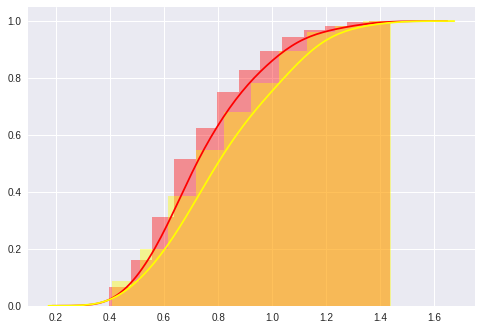

In [98]:
# Cumulative Distribution functions

def alldistributions(DataFrame,condition):
  participantlist = DataFrame.participant.unique()

  congruent_RTs_correct, incongruent_RTs_correct = distributions(DataFrame,participantlist[0],condition)

  con = {participantlist[0] :  pd.Series(congruent_RTs_correct.tolist())}
  incon = {participantlist[0] :  pd.Series(incongruent_RTs_correct.tolist())}
  CON = pd.DataFrame(con)
  INCON = pd.DataFrame(incon)
    
#  for y in participantlist[1:]:        
#    congruent_RTs_correct, incongruent_RTs_correct = distributions(DataFrame,y,condition)
#    
#    con = {y :  pd.Series(congruent_RTs_correct.tolist())}
#    con = pd.DataFrame(con)
#    CON = CON.append(con)
    
#    incon = {y :  pd.Series(incongruent_RTs_correct.tolist())}
#    incon = pd.DataFrame(incon)
#    INCON = INCON.append(incon)
     
    
  return CON, INCON 

toplot = DataFrameComplete.loc[DataFrameComplete.RT <= 1.5]

ACON, AINCON = alldistributions(toplot,'A')
BCON, BINCON = alldistributions(toplot,'B')

sns.distplot(ACON,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
            color='red')
sns.distplot(AINCON,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),
            color='yellow')


#sns.distplot(BCON,
#             hist_kws=dict(cumulative=True),
#             kde_kws=dict(cumulative=True),
#            color='violet')
#sns.distplot(BINCON,
#             hist_kws=dict(cumulative=True),
#             kde_kws=dict(cumulative=True),
#            color='yellow')




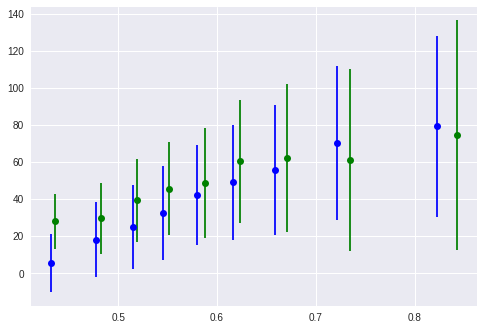

[47.0340022000575, 60.564468536971738, 67.758932383765455, 76.124950571724938, 81.055366108960044, 92.673540237702795, 105.53373389800275, 124.44925727690992, 146.50735097889915]


[15.6780007333525,
 20.188156178990578,
 22.586310794588485,
 25.374983523908313,
 27.018455369653349,
 30.891180079234264,
 35.177911299334248,
 41.48308575896997,
 48.835783659633051]

In [269]:
# Delta Plot

#    quantile differences ( ordinate) vs 
#    quantile  averages (abcissa) 


def DeltaPlot(DataFrame,condition):
  participantlist = DataFrame.participant.unique()    
  congruent, congruent_lang, incongruent, incongruent_lang= DMCQuantiles(DataFrameComplete,'SMRI1',condition)
  con = {participantlist[0] : pd.Series(congruent_lang[2:12], index=['0.1','0.2', '0.3', '0.4','0.5', '0.6', '0.7','0.8', '0.9','1'])}
  incon = {participantlist[0] : pd.Series(incongruent_lang[2:12], index=['0.1','0.2', '0.3', '0.4','0.5', '0.6', '0.7','0.8', '0.9','1'])}
  CON = pd.DataFrame(con)
  INCON = pd.DataFrame(incon)
    
  for y in participantlist[1:]:        
    congruent, congruent_lang, incongruent, incongruent_lang= DMCQuantiles(DataFrameComplete,y,condition)
    con = {y : pd.Series(congruent_lang[2:12], index=['0.1','0.2', '0.3', '0.4','0.5', '0.6', '0.7','0.8', '0.9','1'])}
    con = pd.DataFrame(con)
    CON = pd.concat([CON,con], axis =1)
    incon = {y : pd.Series(incongruent_lang[2:12], index=['0.1','0.2', '0.3', '0.4','0.5', '0.6', '0.7','0.8', '0.9','1'])}
    incon = pd.DataFrame(incon)
    INCON = pd.concat([INCON,incon], axis =1)  

  CON['mean'] = CON.mean(axis=1, skipna = True)
  INCON['mean'] = INCON.mean(axis=1, skipna = True)
  CON['std'] = CON.std(axis=1, skipna = True)
  INCON['std'] = INCON.std(axis=1, skipna = True)
    
  return CON, INCON


quantiles = [0.1 + i * 0.1 for i in range(0,10)]

def plotting(DataFrame,condition,colored,whattocalculate):
  CON, INCON = DeltaPlot(DataFrame,condition)
  x = []
  y = []    
  error = [] 
    #!!!!!!!!!!!!!change here to change the number of quantiles included
  for i in range(0,9):
    x[len(x):] = [((CON[whattocalculate][i] + INCON[whattocalculate][i]) / 2 )]
    y[len(y):] = [((+INCON[whattocalculate][i] - CON[whattocalculate][i]) )]
    # this error bar is potentially wrong, very potentially!
    error[len(error):] = [((+INCON['std'][i] + CON['std'][i]) / 2)]
  y = [i * 1000 for i in y]
  error = [i * 1000 for i in error]
  return x,y,error
  plt.show()    
#  lm = sns.pointplot(x,y,color = colored)
#  axes = lm.axes
#  axes.set_xlim(0.0,)


toplot = DataFrameComplete.loc[(DataFrameComplete.RT <= 1.5)]
#!!!!!!!!!!!!!!!!!!!!!!!!!!! change whattocalculate either to 'mean' or to 'SMRI1'.... in order to get the data
whattocalculate = 'mean'
xA,yA, errorA = plotting(toplot,'A','blue',whattocalculate)
xB,yB, errorB = plotting(toplot,'B','green',whattocalculate)

# calculate the SEM:
myInt = math.sqrt(len(DataFrameComplete.participant.unique()))
SerrorMA = [x / (myInt) for x in errorA]
SerrorMB = [x / (myInt) for x in errorB]

#myList = [10,20,30,40,50,60,70,80,90]
#myInt = 10
#newList = [x / myInt for x in myList]


plt.figure()
plt.errorbar(xA, yA,fmt = 'bo',yerr=SerrorMA)
plt.errorbar(xB,yB,fmt = 'go',yerr=SerrorMB)
plt.show()



#plt.plot([1,2,3,7], [1,4,9,16], 'ro')
#plt.axis([0, 8, 0, 20])
print(errorA)
SerrorMA

In [25]:
CON['mean'][0]


NameError: name 'CON' is not defined

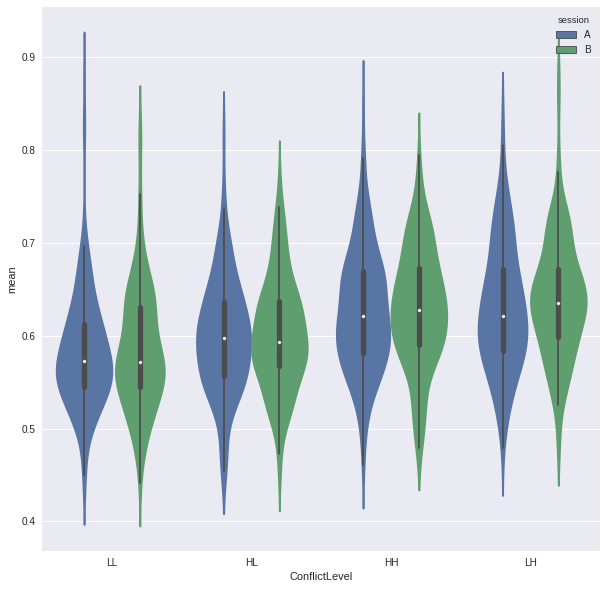

In [326]:
# IC CC CI II plots
def Graton (DataFrame, participant,condition):
  CC =  DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.ConflictLevel == 'LL') & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']
  CI = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.ConflictLevel == 'LH') & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']
  IC = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.ConflictLevel == 'HL') & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']
  II = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.ConflictLevel == 'HH') & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']  
  return CC, CI, IC, II


def GratonDF(DataFrame, condition):
  participantlist = DataFrame.participant.unique()    
  CC, CI, IC, II = Graton(DataFrameComplete,participantlist[0],condition)
  
  cc = {participantlist[0] : pd.Series(CC.tolist())}
  df_CC = pd.DataFrame(cc)
  ci = {participantlist[0] : pd.Series(CI.tolist())}
  df_CI = pd.DataFrame(ci)    
  ic = {participantlist[0] : pd.Series(IC.tolist())}
  df_IC = pd.DataFrame(ic) 
  ii = {participantlist[0] : pd.Series(II.tolist())}
  df_II = pd.DataFrame(ii)
    
  for y in participantlist[1:]:        
    CC, CI, IC, II = Graton(DataFrameComplete,y,condition)
    cc = {y : pd.Series(CC.tolist())}
    ci = {y : pd.Series(CI.tolist())}
    ic = {y : pd.Series(IC.tolist())}
    ii = {y : pd.Series(II.tolist())}
    cc = pd.DataFrame(cc)
    ci = pd.DataFrame(ci)
    ic = pd.DataFrame(ic)
    ii = pd.DataFrame(ii)
    df_CC = pd.concat([df_CC,cc], axis =1)  
    df_CI = pd.concat([df_CI,ci], axis =1)  
    df_IC = pd.concat([df_IC,ic], axis =1)  
    df_II = pd.concat([df_II,ii], axis =1)  
    
    
  df_CC['mean'] = df_CC.mean(axis=1, skipna = True)
  df_CI['mean'] = df_CI.mean(axis=1, skipna = True)
  df_IC['mean'] = df_IC.mean(axis=1, skipna = True)
  df_II['mean'] = df_II.mean(axis=1, skipna = True)
    
  df_CC['std'] = df_CC.std(axis=1, skipna = True)
  df_CI['std'] = df_CI.std(axis=1, skipna = True)
  df_IC['std'] = df_IC.std(axis=1, skipna = True)
  df_II['std'] = df_II.std(axis=1, skipna = True)    

  df_CC.loc['meanCC'] = df_CC.mean(skipna = True)
  df_CI.loc['meanCI'] = df_CI.mean(skipna = True)
  df_IC.loc['meanIC'] = df_IC.mean(skipna = True)
  df_II.loc['meanII'] = df_II.mean(skipna = True)
    
  df_CC['ConflictLevel'] = 'LL'
  df_CI['ConflictLevel'] = 'LH'
  df_IC['ConflictLevel'] = 'HL'
  df_II['ConflictLevel'] = 'HH'


    
    
  DF =  pd.concat([df_CC,df_CI,df_IC,df_II], axis =0)  
    
  return DF

def meanGraton(DataFrame):
  DF_A = GratonDF(DataFrame,'A')
  DF_B = GratonDF(DataFrame,'B')
    
  DF_A['session'] = 'A'
  DF_B['session'] = 'B'
  DF = pd.concat([DF_A,DF_B],axis=0)

  return DF

DF = meanGraton(DataFrameComplete.loc[DataFrameComplete.RT <= 1])


plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="mean", x = "ConflictLevel", hue ='session', data = DF, 
            order=['LL','HL','HH','LH'], hue_order = ['A','B']
          );



In [316]:
DataFrameComplete

linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106       GREEN    congruent      2.0       0.0  10.00000        1  0.834837   
107       GREEN    congruent      2.0       1.0   0.60295        1  0.590948   
108        BLUE  incongruent      3.0       2.0   0.65782        1  0.842361   
109      YELLOW    congruent      3.0       3.0   0.37575        1  0.691485   
110        BLUE  incongruent      3.0       4.0   0.59359        1  0.823725   
111       GREEN  incongruent      2.0       5.0   0.69992        1  0.714757   
112        BLUE  incongruent      3.0       6.0   0.64979        1  0.710633   
113       GREEN  incongruent      2.0       7.0   0.39149        1  0.775869   
114       GREEN  incongruent      2.0       8.0   0.30145        1  0.676785   
115         RED  incongruent      2.0       9.0   0.31533        1  0.835561   
116        BLUE    congruent      3.0      10.0   0.41019        1  0.630994   
117      YELLOW  incongruent      3.0      11.0   0.38112        1  0.554523   
118       GREEN  incongruent      2.0      12.0   0.58408        1  0.901276   
119        BLUE  incongruent      3.0      13.0   0.39149        1  0.591791   
120        BLUE  incongruent      3.0      14.0   0.31100        1  0.686470   
121      YELLOW  incongruent      3.0      15.0   0.55602        1  0.552079   
122         RED  incongruent      2.0      16.0   0.41606        1  1.083363   
123      YELLOW    congruent      3.0      17.0   0.39149        1  0.821117   
124         RED    congruent      2.0      18.0   0.45577        1  0.672648   
125      YELLOW    congruent      3.0      19.0   0.31482        1  0.541137   
126       GREEN  incongruent      2.0      20.0   0.31533        1  1.147031   
127       GREEN  incongruent      2.0      21.0   0.30145        1  0.605186   
128       GREEN    congruent      2.0      22.0   0.55167        1  0.495385   
129         RED    congruent      2.0      23.0   0.67007        1  0.673828   
130       GREEN  incongruent      2.0      24.0   0.37249        1  0.543388   
131        BLUE  incongruent      3.0      25.0   0.34332        1  0.661612   
132        BLUE  incongruent      3.0      26.0   0.31482        1  0.555577   
133      YELLOW    congruent      3.0      27.0   0.60055        1  0.481238   
134         RED  incongruent      2.0      28.0   0.55602        1  0.653388   
135      YELLOW    congruent      3.0      29.0   0.43134        1  0.787475   
...         ...          ...      ...       ...       ...      ...       ...   
11655      BLUE    congruent      3.0     571.0   0.59359        1  0.441435   
11656      BLUE    congruent      3.0     572.0   0.38368        1  0.524763   
11657       RED    congruent      2.0     573.0   0.59133        1  0.757693   
11658    YELLOW    congruent      3.0     574.0   0.42924        1  0.513594   
11659    YELLOW    congruent      3.0     575.0   0.64979        1  0.369187   
11660     GREEN  incongruent      2.0     576.0   0.48307        1  0.489167   
11661      BLUE    congruent      3.0     577.0   0.46005        1  0.524773   
11662     GREEN  incongruent      2.0     578.0   0.52129        1  0.490436   
11663      BLUE  incongruent      3.0     579.0   0.31482        1  0.430383   
11664       RED  incongruent      2.0     580.0   0.51807        1  0.490844   
11665    YELLOW  incongruent      3.0     581.0   0.58569        1  0.564845   
11666    YELLOW  incongruent      3.0     582.0   0.31613        1  0.479518   
11667      BLUE    congruent      3.0     583.0   0.43171        1  0.657828   
11668       RED  incongruent      2.0     584.0   0.58187        1  0.415039   
11669    YELLOW    congruent      3.0     585.0   0.40637        1  0.466570   
11670      BLUE    congruent      3.0     586.0   0.36382        1  0.464854   
11671       RED    congruent      2.0     587.0   0.31100        1  0.382242   
11672     GREEN  incongruent      2.0     588.0   0.50404        1  0.670620   
11673 

In [48]:
# RTs
def RTextraction (DataFrame, participant,condition):
  CongruentRTs =  DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.TrialType == 'congruent') & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']
  IncongruentRTs = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.TrialType == 'incongruent') & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']
  return CongruentRTs,IncongruentRTs


def RToverall(DataFrame, condition):
  participantlist = DataFrame.participant.unique()    
  CC,II = RTextraction(DataFrame,participantlist[0],condition)
  
  cc = {participantlist[0] : pd.Series(CC.tolist())}
  df_CC = pd.DataFrame(cc)
  ii = {participantlist[0] : pd.Series(II.tolist())}
  df_II = pd.DataFrame(ii)
    
  for y in participantlist[1:]:        
    CC, II = RTextraction(DataFrame,y,condition)
    cc = {y : pd.Series(CC.tolist())}
    ii = {y : pd.Series(II.tolist())}
    cc = pd.DataFrame(cc)

    ii = pd.DataFrame(ii)
    df_CC = pd.concat([df_CC,cc], axis =1)   
    df_II = pd.concat([df_II,ii], axis =1)  
    
    
#  df_CC['mean'] = df_CC.mean(axis=1, skipna = True)
#  df_II['mean'] = df_II.mean(axis=1, skipna = True)

    
  df_CC.loc['meanCongruent'+condition] = df_CC.mean(skipna = True)
  df_II.loc['meanIncongruent'+condition] = df_II.mean(skipna = True)
    
#  df_CC['std'] = df_CC.std(axis=1, skipna = True)
#  df_II['std'] = df_II.std(axis=1, skipna = True)    


  df_CC.loc['stdCongruent'+condition] = df_CC.std(skipna = True)
  df_II.loc['stdIncongruent'+condition] = df_II.std(skipna = True)    

  df_CC.loc['SEMCongruent'+condition] = df_CC.std(skipna = True) / math.sqrt(len(df_CC)-2)
  df_II.loc['SEMIncongruent'+condition] = df_II.std(skipna = True) / math.sqrt(len(df_II)-2)      
    
#  df_CC['Congruency'] = 'Congruent'
#  df_II['Congruency'] = 'Incongruent'


    
    
  DF =  pd.concat([df_CC,df_II], axis =0)  
    
  return DF


def RT_all(DataFrame):
  DF_A = RToverall(DataFrame,'A')
  DF_B = RToverall(DataFrame,'B')
    
#  DF_A['session'] = 'A'
#  DF_B['session'] = 'B'
  DF = pd.concat([DF_A,DF_B],axis=0)

  return DF



toplot = DataFrameComplete.loc[DataFrameComplete.RT <= 1]

DF = RT_all(toplot)


#plt.figure()
#plt.errorbar(xA, yA,fmt = 'bo',yerr=SerrorMA)
#plt.errorbar(xB,yB,fmt = 'go',yerr=SerrorMB)
#plt.show()

#plt.figure(figsize=(10, 10))

#plotted = sns.violinplot(y="mean", x = "ConflictLevel", hue ='session', data = DF, 
#            order=['LL','HL','HH','LH'], hue_order = ['A','B']
#          );
#DataFrame = DataFrameComplete
#condition = 'A'
#participant = 'SMRI1'
#DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == participant) & (DataFrame.TrialType == 'congruent') & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']


DF.loc['meanCongruentA']

SMRI1    0.691519
SMRI2    0.520115
SMRI3    0.516438
SMRI4    0.595887
SMRI5    0.621975
SMRI6    0.560273
SMRI7    0.488465
SMRI8    0.558576
Name: meanCongruentA, dtype: float64

          RT session    TrialType
0   0.691519       A    congruent
1   0.520115       A    congruent
2   0.516438       A    congruent
3   0.595887       A    congruent
4   0.621975       A    congruent
5   0.560273       A    congruent
6   0.488465       A    congruent
7   0.558576       A    congruent
8   0.716577       A  incongruent
9   0.565252       A  incongruent
10  0.546501       A  incongruent
11  0.621490       A  incongruent
12  0.647839       A  incongruent
13  0.607591       A  incongruent
14  0.493846       A  incongruent
15  0.577300       A  incongruent
16  0.673534       B    congruent
17  0.566497       B    congruent
18  0.529294       B    congruent
19  0.610309       B    congruent
20  0.624107       B    congruent
21  0.551029       B    congruent
22  0.491915       B    congruent
23  0.498635       B    congruent
24  0.746078       B  incongruent
25  0.605926       B  incongruent
26  0.570892       B  incongruent
27  0.652481       B  incongruent
28  0.662378  

0.60275528480283802

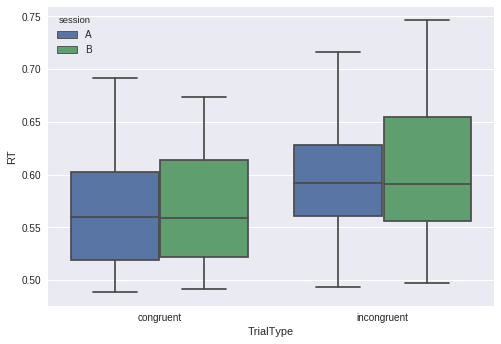

In [71]:
a = DF.loc['meanCongruentA'].tolist()
b = DF.loc['SEMCongruentA'].tolist()
plt.figure()
#plt.errorbar([1 for i in range(0,8)],a[0:8],fmt = 'bo',yerr=b[0:8])
a = DF.loc['meanIncongruentA'].tolist()
b = DF.loc['SEMIncongruentA'].tolist()
#plt.errorbar([2 for i in range(0,8)],a[0:8],fmt = 'bo',yerr=b[0:8])
a = DF.loc['meanCongruentB'].tolist()
b = DF.loc['SEMCongruentB'].tolist()
#plt.errorbar([3 for i in range(0,8)],a[0:8],fmt = 'bo',yerr=b[0:8])
a = DF.loc['meanIncongruentB'].tolist()
b = DF.loc['SEMIncongruentB'].tolist()
#plt.errorbar([4 for i in range(0,8)],a[0:8],fmt = 'bo',yerr=b[0:8])

# umgestalten der Daten:

RT = {'RT' : pd.Series(DF.loc['meanCongruentA'].tolist()+DF.loc['meanIncongruentA'].tolist()+DF.loc['meanCongruentB'].tolist()+DF.loc['meanIncongruentB'].tolist())}
df_RT = pd.DataFrame(RT)
session = {'session': pd.Series(['A' for i in range(0,16)]+['B' for i in range(0,16)])}
SESSION = pd.DataFrame(session)
congruency = {'TrialType': pd.Series(['congruent' for i in range(0,8)]+['incongruent' for i in range(0,8)]+['congruent' for i in range(0,8)]+['incongruent' for i in range(0,8)])}
CONGRUENCY = pd.DataFrame(congruency)

df_RT = pd.concat([df_RT,SESSION,CONGRUENCY], axis =1)  
print(df_RT)


seaborn.boxplot(y="RT", x = "TrialType", hue = 'session', data = df_RT, 
            order=['congruent','incongruent'], hue_order = ['A','B'],
           );

DF.loc['meanIncongruentA'].mean()
DF.loc['meanIncongruentB'].mean()

In [34]:
# DO NOT


# Makes new Panda series to see which session was first (learned first)
DataFrameComplete = DataFrameComplete.assign(LearningDay = 'undefined')


# makes list of all availables subject numbers
forlooplist = []
for i in range(0,100):
    if any( DataFrameComplete.participant == (StudyName + '-' + str(i)) ):
        forlooplist.append(i)

        
# loops through all subjects        
for i in forlooplist: 
# the if structure gives every session a chronological number
  if DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session == 'sham_Day1')].Datum.iloc[0] < DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session == 'verum_Day1')].Datum.iloc[0]: 
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day1'), 'LearningDay'] = 1
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day2'), 'LearningDay'] = 2
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day1'), 'LearningDay'] = 3
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day2'), 'LearningDay'] = 4    
  else:
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day1'), 'LearningDay'] = 3
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day2'), 'LearningDay'] = 4
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day1'), 'LearningDay'] = 1
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day2'), 'LearningDay'] = 2  
#DataFrameComplete.loc[(DataFrameComplete.participant == participant) & (DataFrameComplete.session == 'sham_Day1')].Datum.iloc[0]


#DataFrameComplete.tail()
DataFrameComplete['LearningDay'].value_counts()
DataFrameComplete.tail()

linecolor  TrialType  corrAns  NofTrial      ISI Response        RT  \
701       RED  congruent      2.0     595.0  0.35795        1  0.624413   
702       RED  congruent      2.0     596.0  0.47163        1  0.406121   
703    YELLOW  congruent      3.0     597.0  0.40637        1  0.567673   
704     GREEN  congruent      2.0     598.0  0.31533        1  0.884938   
705       RED  congruent      2.0     599.0  0.37320        1  0.830930   

                 date  Framerate Experiment session participant ConflictLevel  \
701  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1      20171017   
702  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1      20171017   
703  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1      20171017   
704  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1      20171017   
705  2017_Okt_17_1330  98.155242     Stroop      1A       SMRI1      20171017   

         Datum LearningDay  
701  undefined   undefined  
702  undefined   undefined  
703  undefined   undefined  
704  undefined   undefined  
705  undefined   undefined

In [298]:
toplot = DataFrameComplete.loc[(DataFrameComplete.RT <= 1) ]#& (DataFrameComplete.participant == 'SMRI2')]

A = getRTsGeneral(DataFrameComplete.loc[(DataFrameComplete.RT <= 1) ],'A') 
print(A.mean())
B = getRTsGeneral(DataFrameComplete.loc[(DataFrameComplete.RT <= 1) ],'B')
print(B.mean())

Congruent, Incongruent = getRTmeanSTD(toplot,'A')
print('divider')
getRTmeanSTD(toplot,'B')

Congruent

0.579026173165
0.579620002206
RT_congruent 566.566265294
137.42438369
RT_incongruent 591.986338775
148.314258964
StroopEffect 25.4200734809
divider
RT_congruent 564.67986969
138.066641274
RT_incongruent 595.043680182
150.570898242
StroopEffect 30.3638104918


106      0.834837
107      0.590948
109      0.691485
116      0.630994
123      0.821117
124      0.672648
125      0.541137
128      0.495385
129      0.673828
133      0.481238
135      0.787475
138      0.809679
139      0.675090
140      0.504291
147      0.861301
153      0.443423
154      0.455126
155      0.749039
157      0.696613
158      0.578316
163      0.613717
170      0.433001
171      0.517384
176      0.721140
177      0.591714
178      0.519366
179      0.505570
180      0.763367
183      0.856384
188      0.878797
           ...   
10926    0.562777
10932    0.517594
10934    0.579645
10935    0.600629
10936    0.624171
10937    0.441726
10938    0.615999
10939    0.539271
10943    0.541451
10947    0.381345
10951    0.624897
10952    0.959821
10953    0.370031
10954    0.625416
10955    0.600268
10957    0.575967
10963    0.502284
10965    0.818696
10966    0.733699
10967    0.605956
10969    0.454507
10970    0.480474
10971    0.526868
10972    0.683515
10973    0

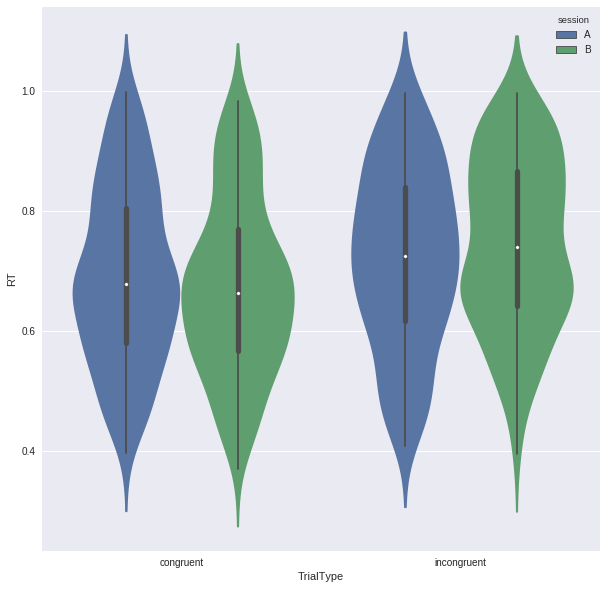

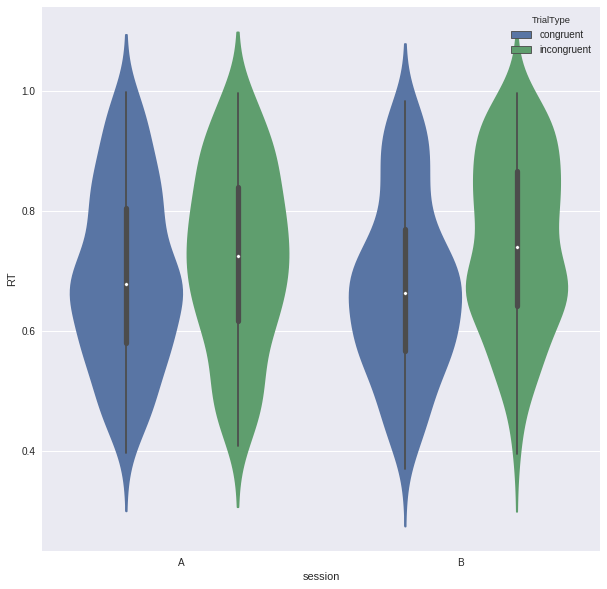

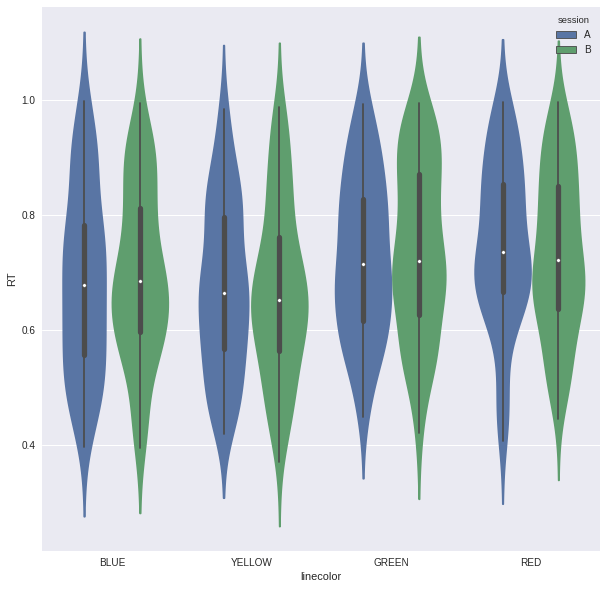

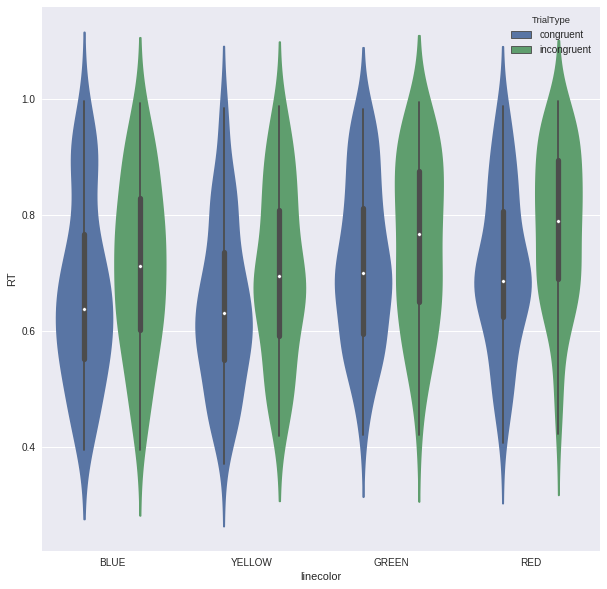

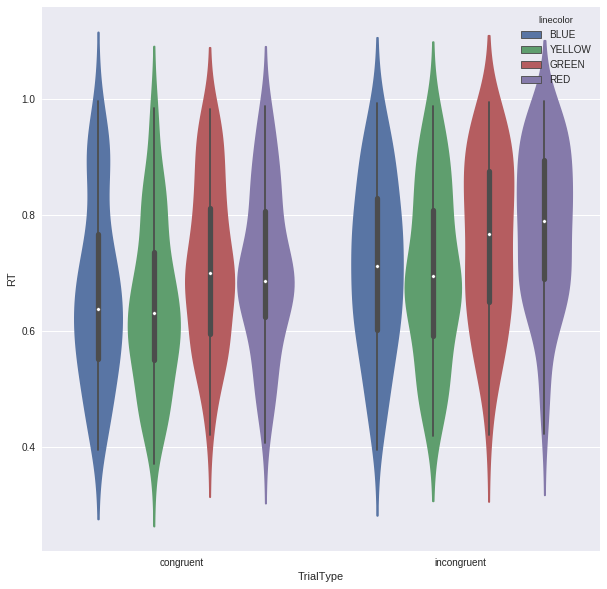

In [296]:
DataFrameComplete.loc[((DataFrameComplete.session == '2A') | (DataFrameComplete.session == '1A')| (DataFrameComplete.session == 'A1')| (DataFrameComplete.session == 'A2')| (DataFrameComplete.session == 'A1-2')) , 'session'] = 'A'
DataFrameComplete.loc[((DataFrameComplete.session == '1B') |  (DataFrameComplete.session == '2B')|  (DataFrameComplete.session == 'B1')|  (DataFrameComplete.session == 'B2')) , 'session'] = 'B'

toplot = DataFrameComplete.loc[(DataFrameComplete.RT <= 1) & (DataFrameComplete.participant == 'SMRI1')]

plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "TrialType", hue = 'session', data = toplot, 
            order=['congruent','incongruent'], hue_order = ['A','B'],
           );

plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "session", hue = 'TrialType', data = toplot, 
            order=['A','B'], hue_order = ['congruent','incongruent'],
           );


plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "linecolor", hue ='session', data = toplot, 
            order=['BLUE','YELLOW','GREEN','RED'] ,hue_order = ['A','B'], 
           );

plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "linecolor", hue ='TrialType', data = toplot, 
            order=['BLUE','YELLOW','GREEN','RED'] ,hue_order = ['congruent','incongruent'], 
           );

plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "TrialType", hue ='linecolor', data =toplot, 
            order=['congruent','incongruent'] ,hue_order = ['BLUE','YELLOW','GREEN','RED'], 
           );


    


In [24]:
len(DataFrameComplete.loc[(DataFrameComplete.participant == 'Till') & (DataFrameComplete.RT > 1.2)])
DataFrameComplete.loc[DataFrameComplete.date == '2017_Okt_06_1131']

0

In [332]:
DataFrameComplete[(DataFrameComplete.linecolor == 'RED')&(DataFrameComplete.TrialType == 'incongruent')  ].RT.mean()
DataFrameComplete

linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106     GREEN    congruent      2.0       0.0  10.00000        1  0.834837   
107     GREEN    congruent      2.0       1.0   0.60295        1  0.590948   
108      BLUE  incongruent      3.0       2.0   0.65782        1  0.842361   
109    YELLOW    congruent      3.0       3.0   0.37575        1  0.691485   
110      BLUE  incongruent      3.0       4.0   0.59359        1  0.823725   
111     GREEN  incongruent      2.0       5.0   0.69992        1  0.714757   
112      BLUE  incongruent      3.0       6.0   0.64979        1  0.710633   
113     GREEN  incongruent      2.0       7.0   0.39149        1  0.775869   
114     GREEN  incongruent      2.0       8.0   0.30145        1  0.676785   
115       RED  incongruent      2.0       9.0   0.31533        1  0.835561   
116      BLUE    congruent      3.0      10.0   0.41019        1  0.630994   
117    YELLOW  incongruent      3.0      11.0   0.38112        1  0.554523   
118     GREEN  incongruent      2.0      12.0   0.58408        1  0.901276   
119      BLUE  incongruent      3.0      13.0   0.39149        1  0.591791   
120      BLUE  incongruent      3.0      14.0   0.31100        1  0.686470   
121    YELLOW  incongruent      3.0      15.0   0.55602        1  0.552079   
122       RED  incongruent      2.0      16.0   0.41606        1  1.083363   
123    YELLOW    congruent      3.0      17.0   0.39149        1  0.821117   
124       RED    congruent      2.0      18.0   0.45577        1  0.672648   
125    YELLOW    congruent      3.0      19.0   0.31482        1  0.541137   
126     GREEN  incongruent      2.0      20.0   0.31533        1  1.147031   
127     GREEN  incongruent      2.0      21.0   0.30145        1  0.605186   
128     GREEN    congruent      2.0      22.0   0.55167        1  0.495385   
129       RED    congruent      2.0      23.0   0.67007        1  0.673828   
130     GREEN  incongruent      2.0      24.0   0.37249        1  0.543388   
131      BLUE  incongruent      3.0      25.0   0.34332        1  0.661612   
132      BLUE  incongruent      3.0      26.0   0.31482        1  0.555577   
133    YELLOW    congruent      3.0      27.0   0.60055        1  0.481238   
134       RED  incongruent      2.0      28.0   0.55602        1  0.653388   
135    YELLOW    congruent      3.0      29.0   0.43134        1  0.787475   
..        ...          ...      ...       ...       ...      ...       ...   
676       RED  incongruent      2.0     570.0   0.37497        1  0.629067   
677     GREEN    congruent      2.0     571.0   0.59359        0  1.118206   
678    YELLOW    congruent      3.0     572.0   0.38368        1  0.493699   
679     GREEN    congruent      2.0     573.0   0.59133        1  0.651019   
680    YELLOW    congruent      3.0     574.0   0.42924        1  0.591151   
681     GREEN    congruent      2.0     575.0   0.64979        1  0.638777   
682      BLUE  incongruent      3.0     576.0   0.48307        1  0.930833   
683    YELLOW    congruent      3.0     577.0   0.46005        0  0.971715   
684    YELLOW  incongruent      3.0     578.0   0.52129        1  0.516677   
685       RED  incongruent      2.0     579.0   0.31482        1  1.009212   
686      BLUE  incongruent      3.0     580.0   0.51807        1  1.147858   
687     GREEN  incongruent      2.0     581.0   0.58569        1  1.206052   
688    YELLOW  incongruent      3.0     582.0   0.31613        1  1.056793   
689      BLUE    congruent      3.0     583.0   0.43171        1  1.221005   
690     GREEN  incongruent      2.0     584.0   0.58187        1  0.886576   
691      BLUE    congruent      3.0     585.0   0.40637        1  0.865251   
692     GREEN    congruent      2.0     586.0   0.36382        1  0.677676   
693    YELLOW    congruent      3.0     587.0   0.31100        1  0.909394   
694    YELLOW  incongruent      3.0     588.0   0.50404        1  0.873594   
695    YELLOW    congruent

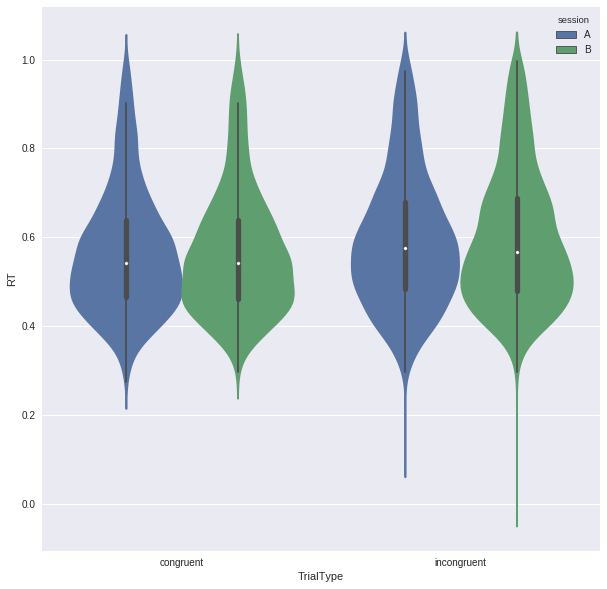

In [145]:
plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "TrialType", hue = 'session' ,data = DataFrameComplete.loc[DataFrameComplete.RT <= 1], 
            order=['congruent','incongruent'] , hue_order = ['A','B']
           );

linecolor    TrialType  corrAns  NofTrial       ISI Response        RT  \
106     GREEN    congruent      2.0       0.0  10.00000        1  0.834837   
107     GREEN    congruent      2.0       1.0   0.60295        1  0.590948   
108      BLUE  incongruent      3.0       2.0   0.65782        1  0.842361   
109    YELLOW    congruent      3.0       3.0   0.37575        1  0.691485   
110      BLUE  incongruent      3.0       4.0   0.59359        1  0.823725   

                 date  Framerate Experiment session participant ConflictLevel  \
106  2017_Okt_17_1330  98.155242     Stroop       A       SMRI1            LL   
107  2017_Okt_17_1330  98.155242     Stroop       A       SMRI1            LL   
108  2017_Okt_17_1330  98.155242     Stroop       A       SMRI1            LH   
109  2017_Okt_17_1330  98.155242     Stroop       A       SMRI1            HL   
110  2017_Okt_17_1330  98.155242     Stroop       A       SMRI1            LH   

         Datum  
106  undefined  
107  undefined  
108  undefined  
109  undefined  
110  undefined

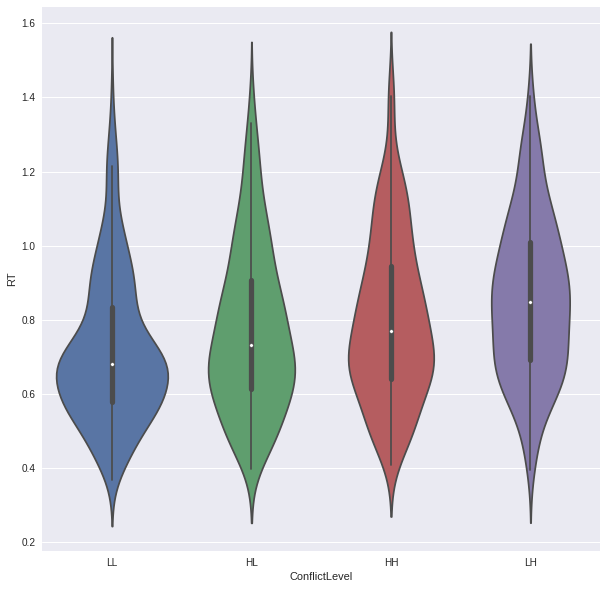

In [192]:
plt.figure(figsize=(10, 10))

plotted = sns.violinplot(y="RT", x = "ConflictLevel", data = DataFrameComplete[DataFrameComplete.participant == 'SMRI1'], 
            order=['LL','HL','HH','LH',] , 
           );
DataFrameComplete.head()

In [105]:
# differentes between HL, LL, HH, LH

minuendHL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HL')]["RT"].mean()

subtrahendHL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HL') ]["RT"].mean()
difference = minuendHL - subtrahendHL
print('HL - difference between tacs - sham',difference)

minuendLH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LH')]["RT"].mean()

subtrahendLH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LH') ]["RT"].mean()
difference = minuendLH - subtrahendLH
print('LHverumSham',difference)

print('verum stimulation LH',minuendLH)

print('sham stimulation LH',subtrahendLH)

minuendHH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HH')]["RT"].mean()

subtrahendHH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HH')]["RT"].mean()
difference = minuendHH - subtrahendHH
print('HHverumSham',difference)

minuendLL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LL')]["RT"].mean()

subtrahendLL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LL')]["RT"].mean()
difference = minuendLL - subtrahendLL
print('LL - difference between tacs - sham',difference)

print('verum stimulation HH',minuendHH)

print('sham stimulation HH',subtrahendHH)

incongruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent')  
                                    ]["RT"].mean()



print ('incongruentVerum', incongruentVerum)

congruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  ]["RT"].mean()



print ('congruentVerum', congruentVerum)

print(minuendHH, minuendHL)
print ('Conflict detection cI - cC: tacs:', minuendLH - minuendLL )
print ('Conflict adaptation iI - iC: tacs:', minuendHH - minuendHL)
print ('LH - HH', minuendLH, minuendHH, minuendLH - minuendHH)
print ('HL - LL', minuendHL, minuendLL, minuendHL - minuendLL)
# congruency sequence effect: [cI - CC]-[iI iC]
print ('congruency sequence effect tacs' , (minuendLH - minuendLL) - (minuendHH - minuendHL))
print ('congruency sequence effect sham' , (subtrahendLH - subtrahendLL) - (subtrahendHH - subtrahendHL))


HL - difference between tacs - sham 0.0
LHverumSham 0.0
verum stimulation LH 0.525359236812
sham stimulation LH 0.525359236812
HHverumSham 0.0
LL - difference between tacs - sham 0.0
verum stimulation HH 0.490485497705
sham stimulation HH 0.490485497705
incongruentVerum 0.500049621312
congruentVerum 0.500049621312
0.490485497705 0.528140294557
Conflict detection cI - cC: tacs: 0.04708404269
Conflict adaptation iI - iC: tacs: -0.0376547968518
LH - HH 0.525359236812 0.490485497705 0.0348737391072
HL - LL 0.528140294557 0.478275194122 0.0498651004345
congruency sequence effect tacs 0.0847388395418
congruency sequence effect sham 0.0847388395418


In [65]:
minuendHL = DataFrameComplete[ (DataFrameComplete["TrialType"] == 'congruent' )   &
                               (DataFrameComplete["ConflictLevel"] == 'HL')]["RT"].mean()

In [66]:
minuendHH  

nan

In [67]:
minuendHL

nan

In [68]:
print(DataFrameComplete[(DataFrameComplete.RowNum == 'RED') &
                       (DataFrameComplete.participant == 'A')]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'GREEN') &
                       (DataFrameComplete.participant == 'A')]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'BLUE') &
                       (DataFrameComplete.participant == 'A')]['RT'].mean())

0.629082924128
0.713237088919
0.694212969184


In [69]:
print(DataFrameComplete[(DataFrameComplete.RowNum == 'RED') 
                       ]['RT'].mean())

print(DataFrameComplete[(DataFrameComplete.RowNum == 'GREEN') 
                       ]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'BLUE') 
                       ]['RT'].mean())
DataFrameComplete.head()

0.659430062436
0.717117574081
0.745873250536


TrialType RowNum   Word  NofTrial   ITI  Correctness        RT  \
102    congruent    RED    RED       0.0  26.0          1.0  0.717548   
103    congruent  GREEN  GREEN       1.0  25.0          0.0  0.634069   
104  incongruent   BLUE  GREEN       2.0  31.0          1.0  0.767547   
105  incongruent    RED   BLUE       3.0  25.0          1.0  0.500408   
106    congruent  GREEN  GREEN       4.0  27.0          1.0  0.616921   

                 date  FrameRate ExperimentTitle  session participant  \
102  2017_Aug_18_1400  59.817196          Stroop        1           E   
103  2017_Aug_18_1400  59.817196          Stroop        1           E   
104  2017_Aug_18_1400  59.817196          Stroop        1           E   
105  2017_Aug_18_1400  59.817196          Stroop        1           E   
106  2017_Aug_18_1400  59.817196          Stroop        1           E   

    ConflictLevel      Datum LearningDay  
102      20170818  undefined   undefined  
103      20170818  undefined   undefined  
104      20170818  undefined   undefined  
105      20170818  undefined   undefined  
106      20170818  undefined   undefined

In [165]:
def distributions(DataFrame, Proband, condition):
  allcongruent_correct = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']
  allincongruent_correct = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']

  return  allcongruent_correct,allincongruent_correct


# Probandendaten zur DMC einspeisen
def DMCQuantiles (DataFrame, Proband,condition):
#Zielstruktur:
#data structure: 
#data[0]:     number of correct trials
#data[1]:     proportion correct
#data[2:7]:   .1, .3, .5, .7, .9 RT quantiles for correct trials (in ms)
#data[7]:     number of incorrect trials
#data[8]:     proportion of incorrect trials
#data[9:14]:  RT quantiles for incorrect trials (in ms). Because we have a number of errors > 10 in each congruency condition, .1, .3, .5 , .7, .9 RT quantiles are computed

  congruent_data = []
  congruent_data_lang = []

  NrCorrTrials = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['participant'].count()
  RatioCorr = NrCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent')]['participant'].count()
  AllCongCorr = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 1.0)]['RT']

  NrInCorrTrials = DataFrame[(DataFrame['session'].str.contains(condition))&(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrameComplete.Response == 0.0)]['participant'].count()
  RatioInCorr = NrInCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent')]['participant'].count()
  AllInCongCorr = DataFrame[ (DataFrame['session'].str.contains(condition)) &(DataFrame.participant == Proband) & (DataFrame.TrialType == 'congruent') & (DataFrame.Response == 0.0)]['RT']



  congruent_data.append(NrCorrTrials)
  congruent_data.append(RatioCorr)
  congruent_data.append(AllCongCorr.quantile(q=.1))
  congruent_data.append(AllCongCorr.quantile(q=.3))
  congruent_data.append(AllCongCorr.quantile(q=.5))
  congruent_data.append(AllCongCorr.quantile(q=.7))
  congruent_data.append(AllCongCorr.quantile(q=.9))
 
  congruent_data.append(NrInCorrTrials)
  congruent_data.append(RatioInCorr)
  congruent_data.append(AllInCongCorr.quantile(q=.1))
  congruent_data.append(AllInCongCorr.quantile(q=.3))
  congruent_data.append(AllInCongCorr.quantile(q=.5))
  congruent_data.append(AllInCongCorr.quantile(q=.7))
  congruent_data.append(AllInCongCorr.quantile(q=.9))

    
  congruent_data_lang.append(NrCorrTrials)
  congruent_data_lang.append(RatioCorr)
  congruent_data_lang.append(AllCongCorr.quantile(q=.1))
  congruent_data_lang.append(AllCongCorr.quantile(q=.2))
  congruent_data_lang.append(AllCongCorr.quantile(q=.3))
  congruent_data_lang.append(AllCongCorr.quantile(q=.4))
  congruent_data_lang.append(AllCongCorr.quantile(q=.5))
  congruent_data_lang.append(AllCongCorr.quantile(q=.6))
  congruent_data_lang.append(AllCongCorr.quantile(q=.7))
  congruent_data_lang.append(AllCongCorr.quantile(q=.8))
  congruent_data_lang.append(AllCongCorr.quantile(q=.9))
  congruent_data_lang.append(AllCongCorr.quantile(q= 1))
    
  congruent_data_lang.append(NrInCorrTrials)
  congruent_data_lang.append(RatioInCorr)
  congruent_data_lang.append(AllInCongCorr.quantile(q=.1))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.2))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.3))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.4))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.5))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.6))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.7))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.8))
  congruent_data_lang.append(AllInCongCorr.quantile(q=.9))
  congruent_data_lang.append(AllInCongCorr.quantile(q= 1))


  print( RatioCorr + RatioInCorr == 1)

  incongruent_data = []
  incongruent_data_lang = []
    
  NrCorrTrials = DataFrame[(DataFrame['session'].str.contains(condition))& (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['participant'].count()
  RatioCorr = NrCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent')]['participant'].count()
  AllCongCorr = DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 1.0)]['RT']

  NrInCorrTrials = DataFrame[ (DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 0.0)]['participant'].count()
  RatioInCorr = NrInCorrTrials / DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent')]['participant'].count()
  AllInCongCorr = DataFrame[(DataFrame['session'].str.contains(condition)) & (DataFrame.participant == Proband) & (DataFrame.TrialType == 'incongruent') & (DataFrame.Response == 0.0)]['RT']

  incongruent_data.append(NrCorrTrials)
  incongruent_data.append(RatioCorr)
  incongruent_data.append(AllCongCorr.quantile(q=.1))
  incongruent_data.append(AllCongCorr.quantile(q=.3))
  incongruent_data.append(AllCongCorr.quantile(q=.5))
  incongruent_data.append(AllCongCorr.quantile(q=.7))
  incongruent_data.append(AllCongCorr.quantile(q=.9))

  incongruent_data.append(NrInCorrTrials)
  incongruent_data.append(RatioInCorr)
  incongruent_data.append(AllInCongCorr.quantile(q=.1))
  incongruent_data.append(AllInCongCorr.quantile(q=.3))
  incongruent_data.append(AllInCongCorr.quantile(q=.5))
  incongruent_data.append(AllInCongCorr.quantile(q=.7))
  incongruent_data.append(AllInCongCorr.quantile(q=.9))
 
  incongruent_data_lang.append(NrCorrTrials)
  incongruent_data_lang.append(RatioCorr)
  incongruent_data_lang.append(AllCongCorr.quantile(q=.1))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.2))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.3))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.4))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.5))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.6))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.7))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.8))
  incongruent_data_lang.append(AllCongCorr.quantile(q=.9))
  incongruent_data_lang.append(AllCongCorr.quantile(q= 1))
    
  incongruent_data_lang.append(NrInCorrTrials)
  incongruent_data_lang.append(RatioInCorr)
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.1))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.2))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.3))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.4))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.5))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.6))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.7))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.8))
  incongruent_data_lang.append(AllInCongCorr.quantile(q=.9))
  incongruent_data_lang.append(AllInCongCorr.quantile(q= 1))

  print(RatioCorr + RatioInCorr == 1)
  return congruent_data, congruent_data_lang, incongruent_data, incongruent_data_lang



In [88]:
AllCongCorr = DataFrameComplete[(DataFrameComplete.participant == Proband) & (DataFrameComplete.TrialType == 'congruent') & (DataFrameComplete.Correctness == 1.0)]['RT']

In [104]:
a.quantile(q = 0.100)

0.5005712509152

In [128]:
print(congruent_data)
incongruent_data

[268, 0.89632107023411367, 0.5005712509152, 0.6023377656939, 0.667330980301, 0.7507240056996001, 0.9341481685636, 31, 0.10367892976588629, 0.6005809307100001, 0.684162855148, 0.7342469692229999, 0.8173151016240001, 1.0677480697600001]


[263,
 0.8915254237288136,
 0.5339045047759999,
 0.6507160186766,
 0.7508771419529999,
 0.8841467380526,
 1.067881822586,
 32,
 0.10847457627118644,
 0.5837085962294001,
 0.6273769617081999,
 0.7758790254595,
 0.8842793464663,
 1.0945235014000003]

0.9341481685636